<a href="https://colab.research.google.com/github/annabel180/projectdlor/blob/main/DLOR_project_solutioning1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solutioning pt 1


1.   Data exploration
2.   Data Preprocessing
3.   Baseline model



In [2]:
import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip Animals.zip -d ./Animals/

Archive:  Animals.zip
  inflating: ./Animals/hen/10.jpeg   
  inflating: ./Animals/hen/100.jpeg  
  inflating: ./Animals/hen/1000.jpeg  
  inflating: ./Animals/hen/1001.jpeg  
  inflating: ./Animals/hen/1010.jpeg  
  inflating: ./Animals/hen/1013.jpeg  
  inflating: ./Animals/hen/1016.jpeg  
  inflating: ./Animals/hen/1017.jpeg  
  inflating: ./Animals/hen/1018.jpeg  
  inflating: ./Animals/hen/102.jpeg  
  inflating: ./Animals/hen/1020.jpeg  
  inflating: ./Animals/hen/1021.jpeg  
  inflating: ./Animals/hen/1023.jpeg  
  inflating: ./Animals/hen/1024.jpeg  
  inflating: ./Animals/hen/1026.jpeg  
  inflating: ./Animals/hen/1028.jpeg  
  inflating: ./Animals/hen/103.jpeg  
  inflating: ./Animals/hen/1030.jpeg  
  inflating: ./Animals/hen/1031.jpeg  
  inflating: ./Animals/hen/1032.jpeg  
  inflating: ./Animals/hen/1033.jpeg  
  inflating: ./Animals/hen/1034.jpeg  
  inflating: ./Animals/hen/1035.jpeg  
  inflating: ./Animals/hen/1039.jpeg  
  inflating: ./Animals/hen/1041.jpeg  
  infla

In [4]:
import os
folder_path = '/content/Animals/cow'
folder_name = os.path.basename(folder_path)

for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(('.jpeg')):
        old_image_path = os.path.join(folder_path, filename)
        new_image_name = f"{folder_name}_{i+1}.jpg"
        new_image_path = os.path.join(folder_path, new_image_name)
        os.rename(old_image_path, new_image_path)


In [5]:
import os
folder_path = '/content/Animals/hen'
folder_name = os.path.basename(folder_path)

for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(('.jpeg')):
        old_image_path = os.path.join(folder_path, filename)
        new_image_name = f"{folder_name}_{i+1}.jpg"
        new_image_path = os.path.join(folder_path, new_image_name)
        os.rename(old_image_path, new_image_path)

In [6]:
import os
folder_path = '/content/Animals/horse'
folder_name = os.path.basename(folder_path)

for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(('.jpeg')):
        old_image_path = os.path.join(folder_path, filename)
        new_image_name = f"{folder_name}_{i+1}.jpg"
        new_image_path = os.path.join(folder_path, new_image_name)
        os.rename(old_image_path, new_image_path)

Data exploration

In [7]:
import os

folder_path1 = '/content/Animals/cow'
folder_path2 = '/content/Animals/hen'
folder_path3 = '/content/Animals/horse'

# List all files in the directory and filter by file extension
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpeg', '.jpg'))]
image_files2 = [f for f in os.listdir(folder_path2) if f.endswith(('.jpeg', '.jpg'))]
image_files3 = [f for f in os.listdir(folder_path3) if f.endswith(('.jpeg', '.jpg'))]

# Count the number of images
num_images = len(image_files)
num_images2 = len(image_files2)
num_images3 = len(image_files3)

print(f"Number of images of cow: {num_images}")
print(f"Number of images of hen: {num_images2}")
print(f"Number of images of horse: {num_images3}")


Number of images of cow: 1451
Number of images of hen: 1451
Number of images of horse: 1451


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to the combined image folder
combined_dir = '/content/Animals'

# Define the class labels
class_labels = ['cow', 'hen','horse']

# Define directories for train, and test sets
train_dir = '/content/train/'
test_dir = '/content/test/'

# Create main directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class
for label in class_labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Function to move images to respective directories
def move_images_to_class_folders():
    for label in class_labels:
        # List all files in the class directory
        class_images = [f for f in os.listdir(os.path.join(combined_dir, label)) if os.path.isfile(os.path.join(combined_dir, label, f))]

        # Split into train and test sets
        train_images, test_images = train_test_split(class_images, test_size=0.3, random_state=42)



        # Move train images
        for image in train_images:
            shutil.move(os.path.join(combined_dir, label, image), os.path.join(train_dir, label, image))

        # Move test images
        for image in test_images:
            shutil.move(os.path.join(combined_dir, label, image), os.path.join(test_dir, label, image))

# Run the function to move images
move_images_to_class_folders()


In [9]:

import os
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming your images are labeled by folder name
def load_data(data_dir):
    X = []
    y = []
    for class_name in os.listdir(data_dir):
      class_dir = os.path.join(data_dir, class_name)
      if os.path.isdir(class_dir): #Check if it is a directory, not a file

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Load and preprocess the image (replace with your actual image loading)
            img = np.random.rand(128, 128, 3)  # Placeholder, replace with actual image loading and resizing
            X.append(img)
            y.append(class_name) #Use folder name as label
    return np.array(X), np.array(y)

# Load data from train and test directories
X_train, y_train = load_data('/content/train')
X_test, y_test = load_data('/content/test')


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3045, 128, 128, 3)
(3045,)
(1308, 128, 128, 3)
(1308,)


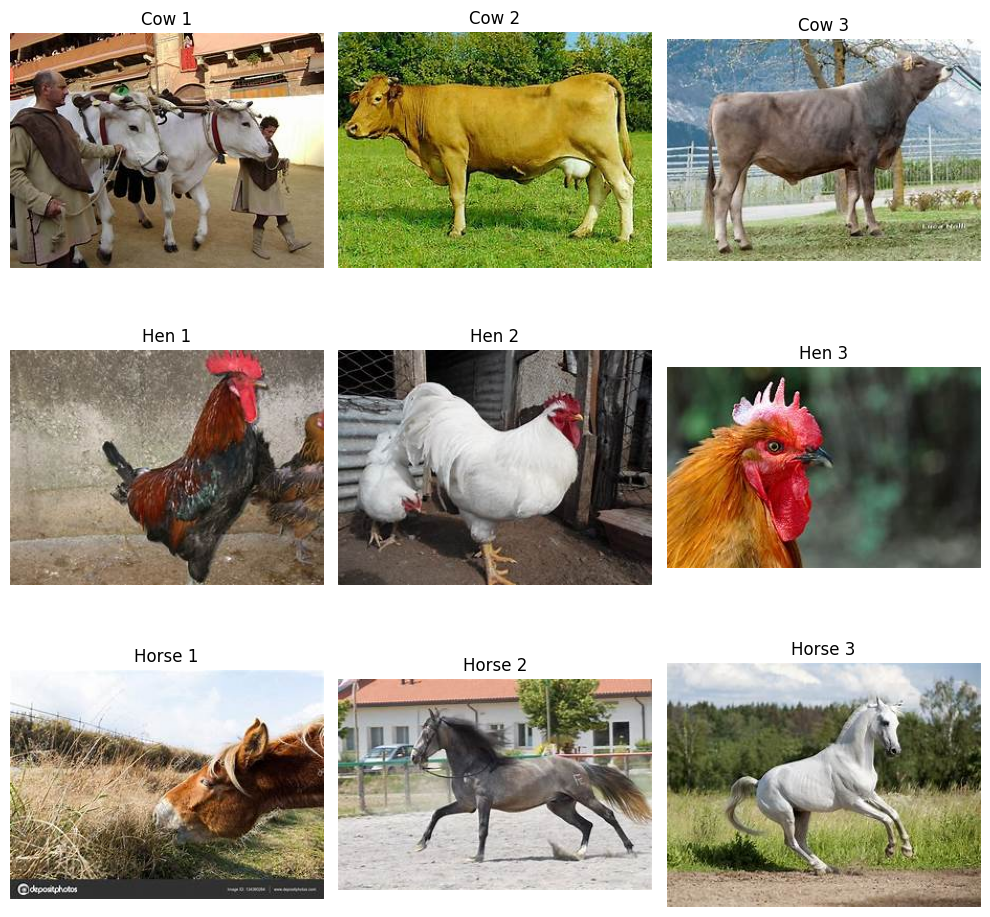

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to your training directory
train_dir = '/content/train'

# Class directories
classes = ['cow', 'hen', 'horse']

# Create a figure for plotting
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop through each class and plot 3 random images
for row, class_name in enumerate(classes):
    # Get the list of files in the directory for the current class
    class_dir = os.path.join(train_dir, class_name)

    # Filter out directories and only select image files (e.g., .jpg, .png)
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f)) and f.endswith(('.jpg', '.png'))]

    # Randomly select 3 images for the current class
    selected_images = random.sample(image_files, 3)

    # Loop through the selected 3 random images for the current class
    for i, image_file in enumerate(selected_images):
        # Build the full image path
        img_path = os.path.join(class_dir, image_file)

        # Read and display the image
        img = mpimg.imread(img_path)
        axes[row, i].imshow(img)
        axes[row, i].axis('off')  # Hide the axis
        axes[row, i].set_title(f'{class_name.capitalize()} {i+1}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [11]:
import keras
from keras import callbacks
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD

In [12]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [13]:
print(X_test.dtype)  # If X_test is a DataFrame
print(y_test.dtype)  # If y_test is a DataFrame or Series


float64
<U5


One hot encoding

In [14]:
import pandas as pd
sorted(pd.DataFrame(y_train,columns=['y'])['y'].unique()) #print the classes

['cow', 'hen', 'horse']

In [15]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the train and test data
X_train, y_train = load_data('/content/train')
X_test, y_test = load_data('/content/test')


# Reshape labels to a column vector=
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


# Convert to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Unique labels: {np.unique(y_train)}")


Unique labels: [0. 1.]


In [16]:
X_test = X_test.astype('float32')  # change data type
y_test = y_test.astype('float64')   # change data type
y_train = y_train.astype('float64') #change data type

In [17]:
print(X_test.dtype)
print(y_test.dtype)

float32
float64


In [18]:
print (y_test.shape)

(1308, 3)


In [19]:
img_rows, img_cols = 128, 128

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the pixel values to range [0, 1]
X_train /= 255
X_test /= 255

# Display the shape and number of samples
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (3045, 128, 128, 3)
3045 train samples
1308 test samples


In [21]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(3045, 128, 128, 3)
(3045, 3)
(1308, 128, 128, 3)
(1308, 3)


In [22]:
batch_size = 128 #parameters to tune on how to optimise model
num_classes = 3 #cow, hen and horse
epochs = 15 #paramters to tune on how to optimise model (how many iterations)

Data augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0, 1]
    rotation_range=45,  #rotate by 15 degrees
    zoom_range=0.05,   #zoom in to 5%
    width_shift_range=0.03, #shift by 3%
    height_shift_range=0.03, #shift by 3%
    horizontal_flip=True, #flip horizontally
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image preprocessing for training and validation sets
test_datagen = ImageDataGenerator(rescale=1./255)   # Same rescaling for validation data

# Define directories
train_dir = '/content/train/'  # Original training data
validation_dir = '/content/test/'  # Original validation data

# Use flow_from_directory to load the images from the original dataset
train_generator = datagen_train.flow_from_directory(
    train_dir,  # Directory containing the training data
    target_size=(128,128),  # Resize images to 128,128
    color_mode="rgb", # Use RGB color mode
    class_mode='categorical',  # Use categorical labels (multi-class classification)
)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # Directory containing the test data
    target_size=(128,128),  # Resize images to 128x128
    color_mode="rgb",
    class_mode='categorical'  # Use categorical labels for validation
)


Found 3045 images belonging to 3 classes.
Found 1308 images belonging to 3 classes.


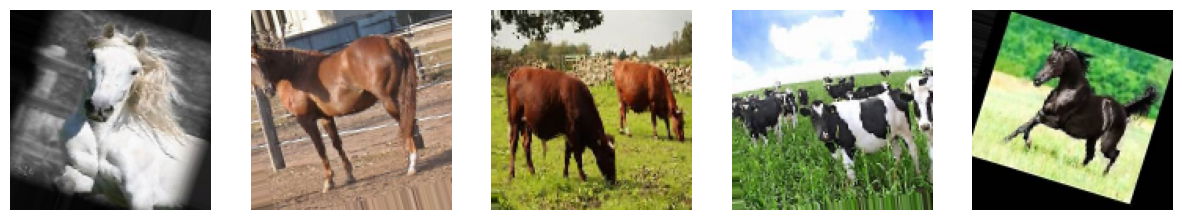

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of augmented images from the generator
augmented_images, labels = next(train_generator)

# Plot the first few augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i in range(5):
    axes[i].imshow(augmented_images[i])  # Show the augmented image
    axes[i].axis('off')

plt.show()


Baseline model



In [ ]:
model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(8, kernel_size=(3,3), #8 filters, so there is 8 pieces of 3 by 3 window
                        strides=(1,1), #how many pixels to use in each step
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=(128,128,3), #input shape of the image
                        use_bias=True,
                        kernel_initializer='glorot_uniform', #'glorot_uniform' define starting weights of filters
                        bias_initializer='zeros'))


model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), #16 filters
                        padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # use 2x2 square, then take max value from the square, then move by 2 pixel to next window.


# third set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same')) #32 filters
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# fourth set of CONV => RELU => POOL

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), #64 filters
                        padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# fifth set of CONV => RELU => POOL

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), #128 filters
                        padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#fully connected layer
model.add(tf.keras.layers.Flatten()) #to flatten to 1D array - so that it becomes yr typical input layer for MLP
model.add(tf.keras.layers.Dense(84,activation='relu')) #fully connected layer with 84 neurons
model.add(Dropout(0.3))  # Apply Dropout

# Classifier
model.add(tf.keras.layers.Dense(num_classes)) #depends on how many unique labels

model.add(tf.keras.layers.Activation('softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │         172,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,755 (1.03 MB)

 Trainable params: 270,755 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #multiclass classification
              metrics=['accuracy'])

In [ ]:
model_log = model.fit(train_generator,
                      batch_size=batch_size,
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 556ms/step - accuracy: 0.3597 - loss: 1.0940 - val_accuracy: 0.4893 - val_loss: 0.9942
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 553ms/step - accuracy: 0.4647 - loss: 1.0070 - val_accuracy: 0.5703 - val_loss: 0.8796
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 561ms/step - accuracy: 0.5147 - loss: 0.9447 - val_accuracy: 0.5520 - val_loss: 0.9114
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 554ms/step - accuracy: 0.5354 - loss: 0.9010 - val_accuracy: 0.6139 - val_loss: 0.7860
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 546ms/step - accuracy: 0.5989 - loss: 0.8378 - val_accuracy: 0.6667 - val_loss: 0.7190
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 554ms/step - accuracy: 0.6019 - loss: 0.8045 - val_accuracy: 0.6774 - val_loss: 0.6814
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 593ms/step - accuracy: 0.6280 - loss: 0.7694 - val_accuracy: 0.6881 - val_loss: 0.6521
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 560ms/step - accuracy: 0.6509 - loss: 0.7566 - val_accu

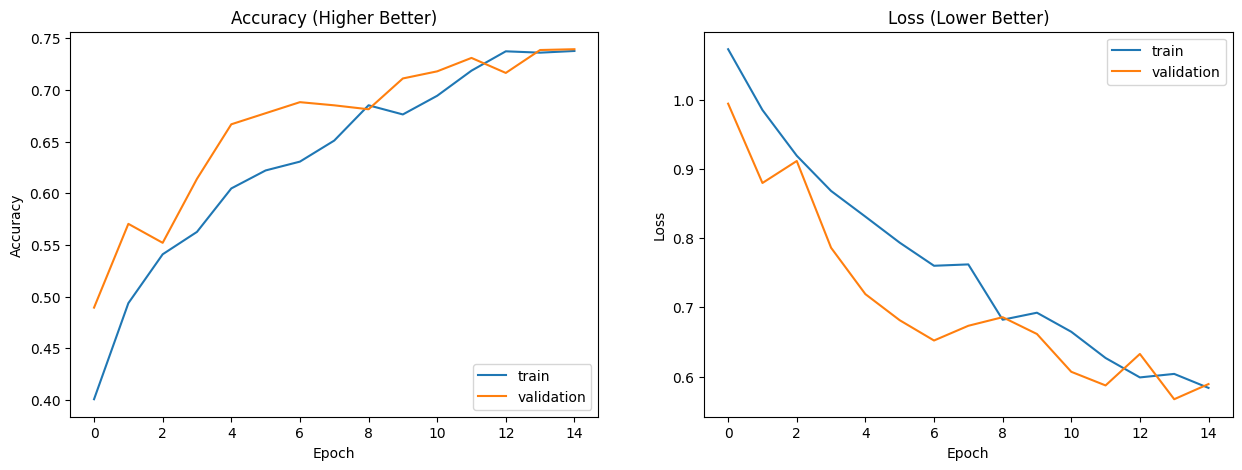

In [ ]:
import matplotlib.pyplot as plt


f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
#loss is useful to determine number of epochs to run. if loss flatline means enough of epochs, no need to run more.


Solutioning pt 2




1.   Three addition models (Resnet, Mobilenet, VGG16)
2.   Fine tuning



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0, 1]
    rotation_range=15,  #rotate by 15 degrees
    zoom_range=0.05,   #zoom in to 5%
    width_shift_range=0.03, #shift by 3%
    height_shift_range=0.03, #shift by 3%
    horizontal_flip=True, #flip horizontally
)

RESNET

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load Pretrained ResNet50 without the top classification layer
pretrained_model = ResNet50(
    input_shape=(224, 224, 3),  # Input image size
    include_top=False,          # Remove fully connected layers
    weights='imagenet'          # Use pretrained ImageNet weights
)

# Freeze the base model
pretrained_model.trainable = False
num_class=3


model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(), #global average pooling is used to convert feature maps to a vector (common for resnet)
    tf.keras.layers.Dense(256, activation='relu'), #classification
    tf.keras.layers.Dropout(0.3), #prevents overfitting
    tf.keras.layers.Dense(num_class, activation='softmax')

])

# Display model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3045 images belonging to 3 classes.
Found 1308 images belonging to 3 classes.


In [ ]:
model_log = model.fit(train_generator,
                      batch_size=batch_size,
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 736s 31s/step - accuracy: 0.3469 - loss: 1.1742 - val_accuracy: 0.3670 - val_loss: 1.0944
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 783s 33s/step - accuracy: 0.3673 - loss: 1.1377 - val_accuracy: 0.3937 - val_loss: 1.0901
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 732s 31s/step - accuracy: 0.3777 - loss: 1.1094 - val_accuracy: 0.3853 - val_loss: 1.0828
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 746s 31s/step - accuracy: 0.3944 - loss: 1.0888 - val_accuracy: 0.3953 - val_loss: 1.0826
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 735s 31s/step - accuracy: 0.3999 - loss: 1.0784 - val_accuracy: 0.3991 - val_loss: 1.0775
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 731s 31s/step - accuracy: 0.4185 - loss: 1.0700 - val_accuracy: 0.4083 - val_loss: 1.0742
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 728s 31s/step - accuracy: 0.4249 - loss: 1.0579 - val_accuracy: 0.4021 - val_loss: 1.0731
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 780s 33s/step - accuracy: 0.4258 - loss: 1.0535 - val_accuracy: 0.

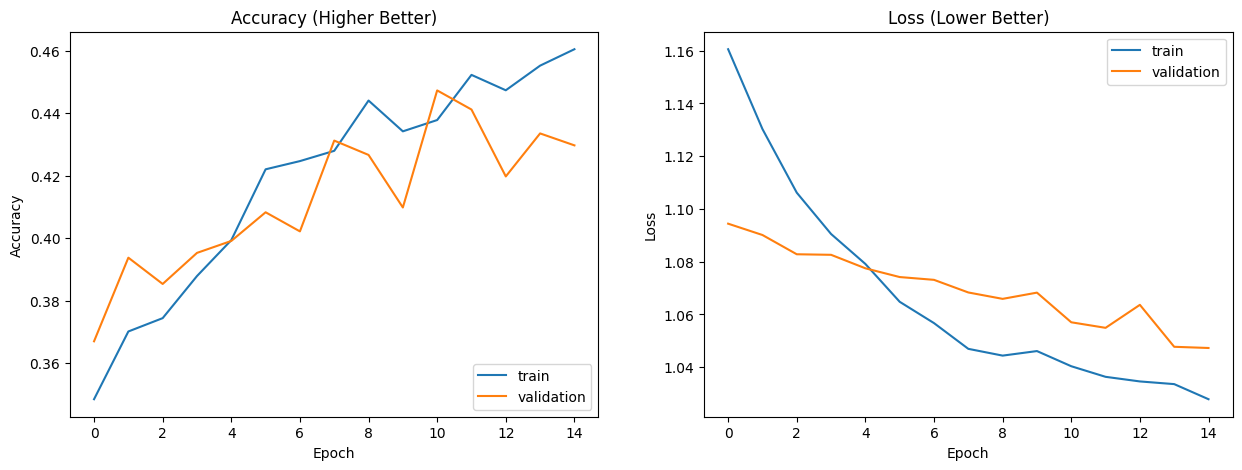

In [ ]:
import matplotlib.pyplot as plt


f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

MOBILENET

In [25]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights = 'imagenet')

pretrained_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image preprocessing for training and validation sets
test_datagen = ImageDataGenerator(rescale=1./255)   # Same rescaling for validation data

# Define directories
train_dir = '/content/train/'  # Original training data
validation_dir = '/content/test/'  # Original validation data

# Use flow_from_directory to load the images from the original dataset
train_generator = datagen_train.flow_from_directory(
    train_dir,  # Directory containing the training data
    target_size=(224,224),  # Resize images to 224,224
    color_mode="rgb", # Use RGB color mode
    class_mode='categorical',  # Use categorical labels (multi-class classification)
    shuffle=True
)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # Directory containing the test data
    target_size=(224,224),  # Resize images to 224,224
    color_mode="rgb",
    class_mode='categorical'  # Use categorical labels for validation
)


Found 3045 images belonging to 3 classes.
Found 1308 images belonging to 3 classes.


In [27]:
# Freeze the Pre-Trained Model - #MLP
pretrained_model.trainable = False
num_class = 3

# Create a tf.keras.Sequential model, and add the pre-trained model and the new classification layer
model2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(), #want 1D pictures
    tf.keras.layers.Dense(256, activation='relu'), #classification
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_class, activation='softmax')

])

In [28]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,315,331 (69.87 MB)

 Trainable params: 16,057,347 (61.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model_log = model2.fit(train_generator,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.8548 - loss: 3.0633 - val_accuracy: 0.9228 - val_loss: 0.7320
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9319 - loss: 0.7897 - val_accuracy: 0.9557 - val_loss: 0.2289
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9637 - loss: 0.2145 - val_accuracy: 0.9625 - val_loss: 0.1481
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9671 - loss: 0.1051 - val_accuracy: 0.9610 - val_loss: 0.1945
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9659 - loss: 0.1240 - val_accuracy: 0.9557 - val_loss: 0.1906
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9611 - loss: 0.1020 - val_accuracy: 0.9618 - val_loss: 0.1733
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9741 - loss: 0.0713 - val_accuracy: 0.9595 - val_loss: 0.1332
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9798 - loss: 0.0678 - val_accuracy: 0.9557 - v

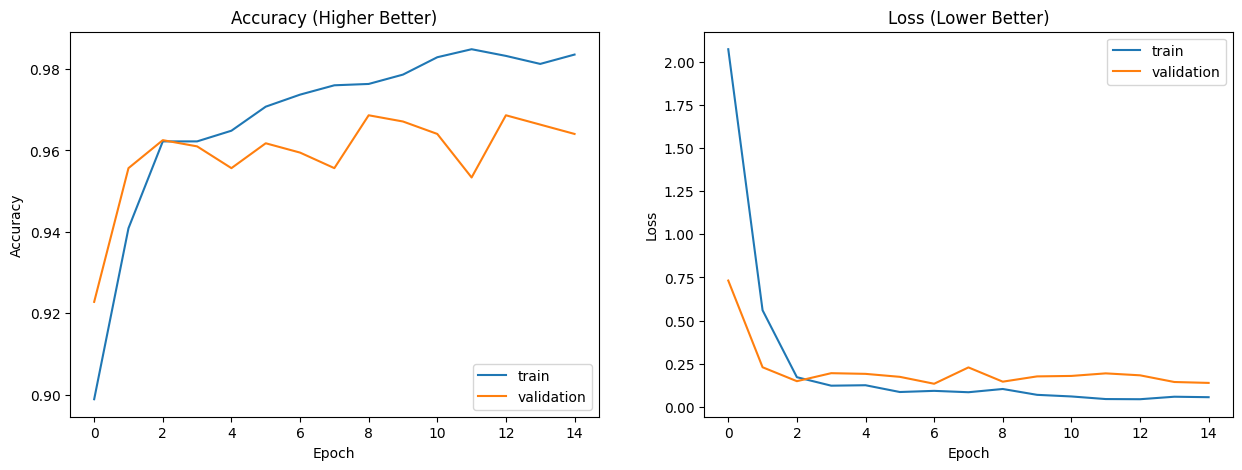

In [ ]:
import matplotlib.pyplot as plt


f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

VGG 16



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
model3 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [ ]:
model3.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze the Pre-Trained Model - #MLP
pretrained_model.trainable = False
num_class = 3

# Create a tf.keras.Sequential model, and add the pre-trained model and the new classification layer
model3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(), #want 1D pictures
    tf.keras.layers.Dense(256, activation='relu'), #classification
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_class, activation='softmax')

])

In [ ]:
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model_log = model3.fit(train_generator,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.8443 - loss: 3.1447 - val_accuracy: 0.9404 - val_loss: 0.1604
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9414 - loss: 0.1632 - val_accuracy: 0.9595 - val_loss: 0.1454
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9570 - loss: 0.1318 - val_accuracy: 0.9434 - val_loss: 0.1899
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9583 - loss: 0.1226 - val_accuracy: 0.9625 - val_loss: 0.1541
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9597 - loss: 0.1271 - val_accuracy: 0.9625 - val_loss: 0.1626
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9656 - loss: 0.1325 - val_accuracy: 0.9595 - val_loss: 0.1691
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9567 - loss: 0.1211 - val_accuracy: 0.9595 - val_loss: 0.1382
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9700 - loss: 0.1167 - val_accuracy: 0.9465 - v

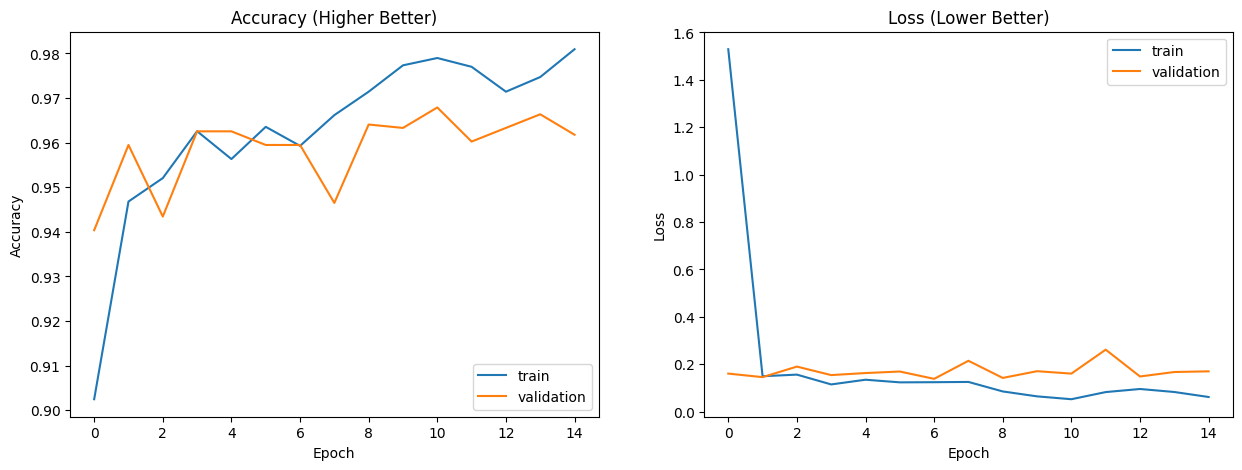

In [ ]:
import matplotlib.pyplot as plt


f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

Grid Search

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'units': [128,256, 512],
    'dropout': [0.4, 0.5],
    'learning_rate': [0.001, 0.0005]
}

for params in ParameterGrid(param_grid):
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(params['units'], activation='relu'),
        tf.keras.layers.Dropout(params['dropout']),
        tf.keras.layers.Dense(num_class, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_generator, epochs=5, validation_data=validation_generator)

In [34]:
model_json = model2.to_json()
with open("animals.json", "w") as json_file:
    json_file.write(model_json)

model2.save_weights("animals.weights.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming 'test_image' is your input image
test_image = image.load_img('/content/Cow_female_black_white.jpg.webp', target_size=(224, 224))  # Resize to 224x224
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Normalize the image (if required by the model)
test_image = test_image / 255.0  # Normalization to [0,1] range if necessary

# Predict
result = model2.predict(test_image, verbose=0)


In [59]:
loaded_single_img = tf.keras.utils.load_img('/content/Hen.webp',
                                            color_mode='rgb',#grayscale or rgb
                                            target_size = (224,224))

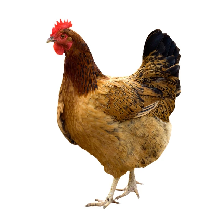

In [60]:
loaded_single_img

In [61]:
test_image = tf.keras.utils.img_to_array(loaded_single_img)
test_image /= 255
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 224, 224, 3)


In [62]:
logits = model2(test_image)
print(logits)
softmax = tf.nn.softmax(logits)
print(softmax)

tf.Tensor([[0.2454678  0.10528977 0.6492424 ]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.2970294  0.25817898 0.44479156]], shape=(1, 3), dtype=float32)


In [63]:
predict_output = tf.argmax(logits, -1).numpy()
classes = ['cow','horse','hen']
print(classes[predict_output[0]])

hen
